- KNN

In [25]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [26]:
from sklearn.datasets import make_classification

x,y = make_classification(
n_samples= 1000, 
n_features= 3 ,
n_redundant=1 ,
n_classes=2 ,
random_state= 999
)

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score

x_train ,x_test , y_train ,y_test = train_test_split(x,y , test_size= 0.33 ,random_state= 42 )

In [28]:
from sklearn.neighbors import KNeighborsClassifier # More availaible as well 

In [29]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |
 |  Classifier implementing the k-nearest neighbors vote.
 |
 |  Read more in the :ref:`User Guide <classification>`.
 |
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a q

In [30]:
classifier = KNeighborsClassifier(n_neighbors=5 , algorithm='auto')
# n_neighbour is k  
classifier.fit(x_train , y_train)

KNeighborsClassifier()

In [31]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [32]:
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

In [33]:
y_pred = classifier.predict(x_test)

In [34]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[158  20]
 [ 11 141]]
0.906060606060606
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       178
           1       0.88      0.93      0.90       152

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [35]:
from sklearn.model_selection import GridSearchCV

In [37]:
k_values = range(1, 31)
cv_scores = []  # Cross-validation scores for each k

# Perform cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')  # 5-fold CV
    cv_scores.append(scores.mean())  # Store the average accuracy for this k

# Determine the optimal k
optimal_k = k_values[np.argmax(cv_scores)]
print(f"Optimal k-value: {optimal_k}")


Optimal k-value: 9


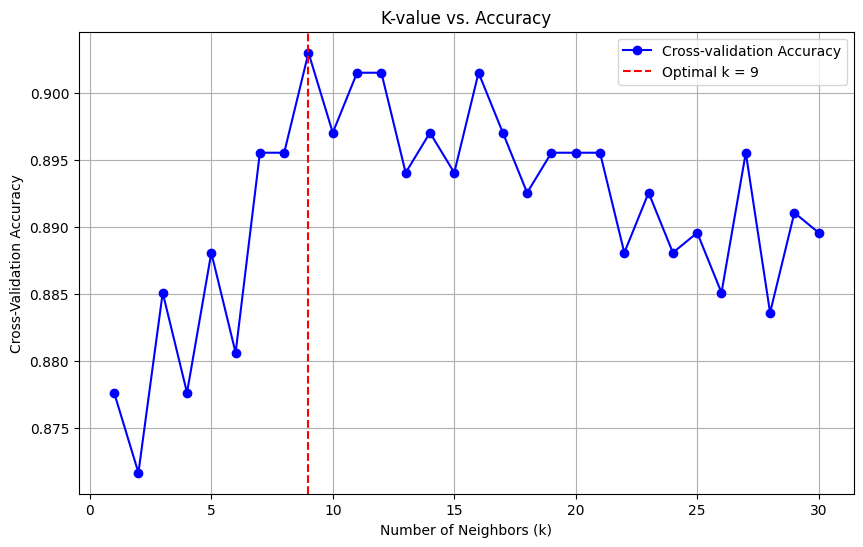

In [40]:
k_values = range(1, 31)
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b', label='Cross-validation Accuracy')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('K-value vs. Accuracy')
plt.legend()
plt.grid()
plt.show()